In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import evaluationData

from causallib.datasets import load_nhefs
from causallib.estimation import IPW, StratifiedStandardization
from causallib.evaluation import evaluate

### BPIC2017 dataset

In [3]:
df = pd.read_csv("bpi2017_final.csv")
df.head()

,case:concept:name,NumberOfOffers,Action,org:resource,concept:name,EventOrigin,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,...,CreditScore,OfferedAmount,treatedCase,caseSuccesful,treatmentSuccess,offerNumber,offerSuccess,treatmentOffer,timeApplication,weekdayApplication
0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,651433.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,2.0
1,0.0,1.0,4.0,0.0,8.0,0.0,1.0,651434.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061,2.0
2,0.0,1.0,0.0,0.0,22.0,2.0,3.0,651435.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.290,2.0
3,0.0,1.0,1.0,0.0,22.0,2.0,6.0,651437.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,66.613,2.0
4,0.0,1.0,0.0,0.0,21.0,2.0,3.0,651438.0,10.0,1.0,...,0.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,66.620,2.0


In [4]:
feature_names = ['NumberOfOffers', 'Action', 'org:resource',
       'concept:name', 'EventOrigin', 'lifecycle:transition', 'time:timestamp',
       'case:LoanGoal', 'case:ApplicationType', 'case:RequestedAmount',
       'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'CreditScore', 'OfferedAmount', 'offerNumber','timeApplication', 'weekdayApplication']

In [5]:
t=df['treatmentOffer']
X = df[feature_names]
y=df['offerSuccess']

### Synthetic Dataset

In [16]:
df_synth = pd.read_csv("synthetic_dataset.csv")
print(df_synth.columns)
df_synth.head()

Index(['case:concept:name', 'NumberOfOffers', 'concept:name',
       'lifecycle:transition', 'time:timestamp', 'elementId', 'resourceId',
       'treatment', 'successful', 'treatmentSuccess', 'weekdayApplication',
       'timeApplication'],
      dtype='object')


,case:concept:name,NumberOfOffers,concept:name,lifecycle:transition,time:timestamp,elementId,resourceId,treatment,successful,treatmentSuccess,weekdayApplication,timeApplication
0,0.0,2.0,29.0,0.0,152.0,28.0,1.0,1.0,1.0,2.0,1.0,0.0
1,0.0,2.0,29.0,2.0,152.0,28.0,1.0,1.0,1.0,2.0,1.0,0.0
2,0.0,2.0,29.0,1.0,152.0,28.0,1.0,1.0,1.0,2.0,1.0,0.0
3,0.0,2.0,5.0,0.0,152.0,7.0,1.0,1.0,1.0,2.0,1.0,0.0
4,0.0,2.0,5.0,2.0,152.0,7.0,0.0,1.0,1.0,2.0,1.0,0.0


In [13]:
synthetic_features = ['NumberOfOffers', 'concept:name',
       'lifecycle:transition', 'time:timestamp', 'elementId', 'resourceId',
       'weekdayApplication', 'timeApplication']

In [17]:
t=df_synth['treatment']
X = df_synth[synthetic_features]
y=df_synth['treatmentSuccess']

### Model

In [18]:
ipw = IPW(LogisticRegression(max_iter=2000), clip_min=0.05, clip_max=0.95)
ipw.fit(X, t, y)

/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

IPW(clip_max=0.95, clip_min=0.05, use_stabilized=False, verbose=False,
    learner=LogisticRegression(max_iter=2000))

In [29]:
outcomes = ipw.estimate_population_outcome(X,t, y)
effect = ipw.estimate_effect(outcomes[1], outcomes[0])
print(effect.values[0])

2.0


/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### Add ATE result in result Dataframe

In [23]:
%store -r df_results

method = "IPW LR"
lib = "Causallib"

if method in df_results['method'].values:
     # If the method is already in the DataFrame, update the ATE and ITE columns
    df_results.loc[df_results['method'] == method, 'ATE'] = effect.values[0]
else:
    # If the method is not in the DataFrame, add a new row
    df_results = df_results._append({'method': method, 'ATE': effect.values[0], 'ITE': '', 'Library': lib}, ignore_index=True)

print(df_results)
%store df_results

                      method       ATE  \
0          Linear Regression  0.449046   
1                  Double ML  0.470982   
2                        IPW  0.311352   
3                  IPW Hajek  0.311352   
4             IPW Stabalized  0.311352   
5  Propensity Score Matching -0.179289   
6          Distance Matching  0.630322   
7                     IPW LR  0.149171   

                                                 ITE    Library  other  
0                                                NaN      DoWhy    NaN  
1  [[0.        ]\n [0.        ]\n [0.        ]\n ...      DoWhy    NaN  
2                                                NaN      DoWhy    NaN  
3                                                NaN      DoWhy    NaN  
4                                                NaN      DoWhy    NaN  
5                                                NaN      DoWhy    NaN  
6                                                NaN      DoWhy    NaN  
7                                    

## Evaluation 

In [8]:
placeboData, placebo_X, placebo_y, placebo_t = evaluationData.placeboTreatment(df)

causeData, cause_X, cause_y, cause_t = evaluationData.randomCause(df)

replaceData, replace_X, replace_y, replace_t, replaced_feature = evaluationData.randomReplace(df)
print(replaced_feature)

subsetData, subset_X, subset_y, subset_t = evaluationData.randomSubsetData(df)

/pfs/data5/home/ma/ma_ma/ma_mskiera/master-thesis/evaluationData.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inference_features['random covariate'] = new_data


NumberOfTerms


In [9]:
ipw_placebo = ipw.fit(placebo_X, placebo_t, placebo_y)
placebo_outcomes = ipw_placebo.estimate_population_outcome(placebo_X,placebo_t, placebo_y)
placebo_effect = ipw_placebo.estimate_effect(placebo_outcomes[1], placebo_outcomes[0])
placebo_ate = placebo_effect.values[0]
placebo_ate

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

7.290675801963076e-06

In [10]:
ipw_replace = IPW(LogisticRegression(max_iter=2000), clip_min=0.05, clip_max=0.95)
ipw_replace.fit(replace_X, replace_t, replace_y)
replace_outcomes = ipw_replace.estimate_population_outcome(replace_X, replace_t, replace_y)
replace_effect = ipw_replace.estimate_effect(replace_outcomes[1], replace_outcomes[0])
replace_ate = replace_effect.values[0]
replace_ate

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

7.290713472163368e-06

In [11]:
ipw_cause = IPW(LogisticRegression(max_iter=2000), clip_min=0.05, clip_max=0.95)
ipw_cause.fit(cause_X, cause_t, cause_y)
cause_outcomes = ipw_cause.estimate_population_outcome(cause_X, cause_t, cause_y)
cause_effect = ipw_cause.estimate_effect(cause_outcomes[1], cause_outcomes[0])
cause_ate = cause_effect.values[0]
cause_ate

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

7.290675840820882e-06

In [12]:
ipw_subset = IPW(LogisticRegression(max_iter=2000), clip_min=0.05, clip_max=0.95)
ipw_subset.fit(subset_X, subset_t, subset_y)
subset_outcomes = ipw_subset.estimate_population_outcome(subset_X, subset_t, subset_y)
subset_effect = ipw_subset.estimate_effect(subset_outcomes[1], subset_outcomes[0])
subset_ate = subset_effect.values[0]
subset_ate

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

-9.512065710104434e-05

In [13]:
%store -r df_evaluation_results
lib = "Caulsallib"
method = "IPW LR"

if method in df_evaluation_results['method'].values:
     # If the method is already in the DataFrame, update the ATE and ITE columns
    df_evaluation_results.loc[df_evaluation_results['method'] == method, 'Random Common Cause ATE'] = cause_ate
    df_evaluation_results.loc[df_evaluation_results['method'] == method, 'Placebo treatment ATE'] = placebo_ate
    df_evaluation_results.loc[df_evaluation_results['method'] == method, 'Random Subset ATE'] = subset_ate
    df_evaluation_results.loc[df_evaluation_results['method'] == method, 'Random Feature Replacement ATE'] = replace_ate
    df_evaluation_results.loc[df_evaluation_results['method'] == method, 'Replaced Feature'] = replaced_feature
else:
    # If the method is not in the DataFrame, add a new row
    df_evaluation_results = df_evaluation_results._append({'method': method, 'Random Common Cause ATE': cause_ate, 'Placebo treatment ATE': placebo_ate, 'Random Subset ATE': subset_ate, 'Random Feature Replacement ATE': replace_ate, 'Replaced Feature': replaced_feature}, ignore_index=True)

%store df_evaluation_results

Stored 'df_evaluation_results' (DataFrame)


### Evaluation from Causallib with plots

In [7]:
results = evaluate(ipw, X, t, y, cv="auto")
results.all_plot_names

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

frozenset({'calibration',
           'covariate_balance_love',
           'covariate_balance_slope',
           'pr_curve',
           'roc_curve',
           'weight_distribution'})

In [8]:
results.evaluated_metrics.prediction_scores

accuracy  precision    recall        f1   roc_auc  \
phase fold                                                        
train 0    0  0.848227   0.445148  0.107172  0.172752  0.689582   
      1    0  0.847975   0.439995  0.103094  0.167048  0.687800   
      2    0  0.847652   0.433940  0.099539  0.161934  0.641421   
      3    0  0.848115   0.440078  0.099786  0.162684  0.641120   
      4    0  0.848264   0.442373  0.100428  0.163693  0.682176   
valid 0    0  0.846448   0.411205  0.089057  0.146406  0.668704   
      1    0  0.846990   0.431523  0.109628  0.174839  0.676603   
      2    0  0.849531   0.461737  0.106070  0.172510  0.648714   
      3    0  0.848446   0.446439  0.103840  0.168490  0.641744   
      4    0  0.848400   0.441891  0.096027  0.157769  0.692425   

              avg_precision     hinge  matthews       0_1     brier  \
phase fold                                                            
train 0    0       0.305024  1.091527  0.160906  0.151773  0.118447   
      1    0       0.302371  1.092078  0.155908  0.152025  0.118604   
      2    0       0.273513  1.109197  0.151008  0.152348  0.123854   
      3    0       0.275908  1.108686  0.153327  0.151885  0.123689   
      4    0       0.296450  1.093053  0.154627  0.151736  0.119168   
valid 0    0       0.276053  1.093997  0.134938  0.153552  0.121024   
      1    0       0.289561  1.094016  0.157875  0.153010  0.120406   
      2    0       0.293321  1.107147  0.165804  0.150469  0.122214   
      3    0       0.277725  1.108671  0.158743  0.151554  0.123682   
      4    0       0.307422  1.091419  0.150925  0.151600  0.117803   

                                confusion_matrix  \
phase fold                                         
train 0    0  [[797965, 18936], [126562, 15192]]   
      1    0  [[798301, 18600], [127140, 14614]]   
      2    0  [[798496, 18406], [127643, 14110]]   
      3    0  [[798905, 17997], [127608, 14145]]   
      4    0  [[798957, 17945], [127518, 14236]]   
valid 0    0     [[199707, 4519], [32282, 3156]]   
      1    0     [[199108, 5118], [31553, 3885]]   
      2    0     [[199843, 4382], [31680, 3759]]   
      3    0     [[199662, 4563], [31759, 3680]]   
      4    0     [[199927, 4298], [32035, 3403]]   

                                                      roc_curve  \
phase fold                                                        
train 0    0  ([0.0, 0.0003513277618707775, 0.00035132776187...   
      1    0  ([0.0, 0.0003672415629311263, 0.00036724156293...   
      2    0  ([0.0, 0.00023258603847217904, 0.0002325860384...   
      3    0  ([0.0, 0.0002533963682302161, 0.00025339636823...   
      4    0  ([0.0, 0.00033296527612859314, 0.0003329652761...   
valid 0    0  ([0.0, 0.0003721367504627227, 0.00037213675046...   
      1    0  ([0.0, 0.00031337831617913486, 0.0003133783161...   
      2    0  ([0.0, 0.0003133798506549149, 0.00031337985065...   
      3    0  ([0.0, 0.00023013832782470316, 0.0002301383278...   
      4    0  ([0.0, 0.0003084832904884319, 0.00030848329048...   

                                                       pr_curve  
phase fold                                                       
train 0    0  ([0.14786758531484215, 0.15336868835261772, 0....  
      1    0  ([0.14786758531484215, 0.15323924023904248, 0....  
      2    0  ([0.1478665421867095, 0.15221312756218175, 0.1...  
      3    0  ([0.1478665421867095, 0.15245312600575636, 0.1...  
      4    0  ([0.1478674310701649, 0.1528605949504208, 0.15...  
valid 0    0  ([0.14786534481607583, 0.15294673754058008, 0....  
      1    0  ([0.14786534481607583, 0.15348658455928355, 0....  
      2    0  ([0.14786951732425396, 0.15256137513382376, 0....  
      3    0  ([0.14786951732425396, 0.15214247096932199, 0....  
      4    0  ([0.14786596178801067, 0.15252217073018867, 0....

In [9]:
results.evaluated_metrics.covariate_balance.head()

abs_smd                    weighted  unweighted
phase fold covariate                           
train 0    NumberOfOffers  1.085199    1.116112
           Action          0.087578    0.102267
           org:resource    0.294922    0.075698
           concept:name    0.085116    0.127099
           EventOrigin     0.014835    0.041367

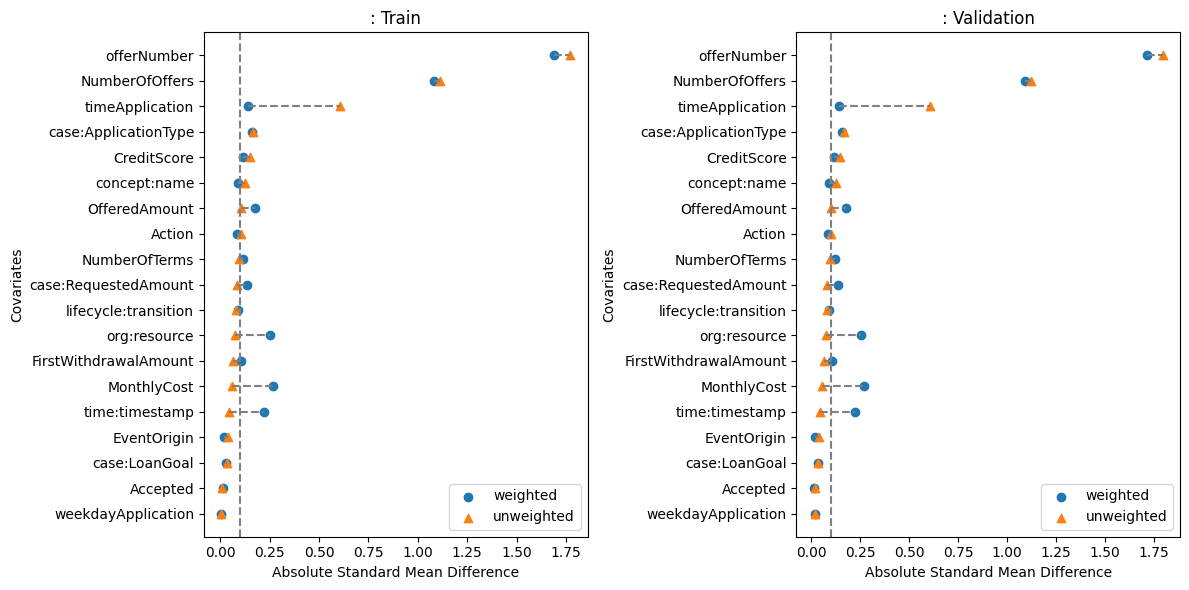

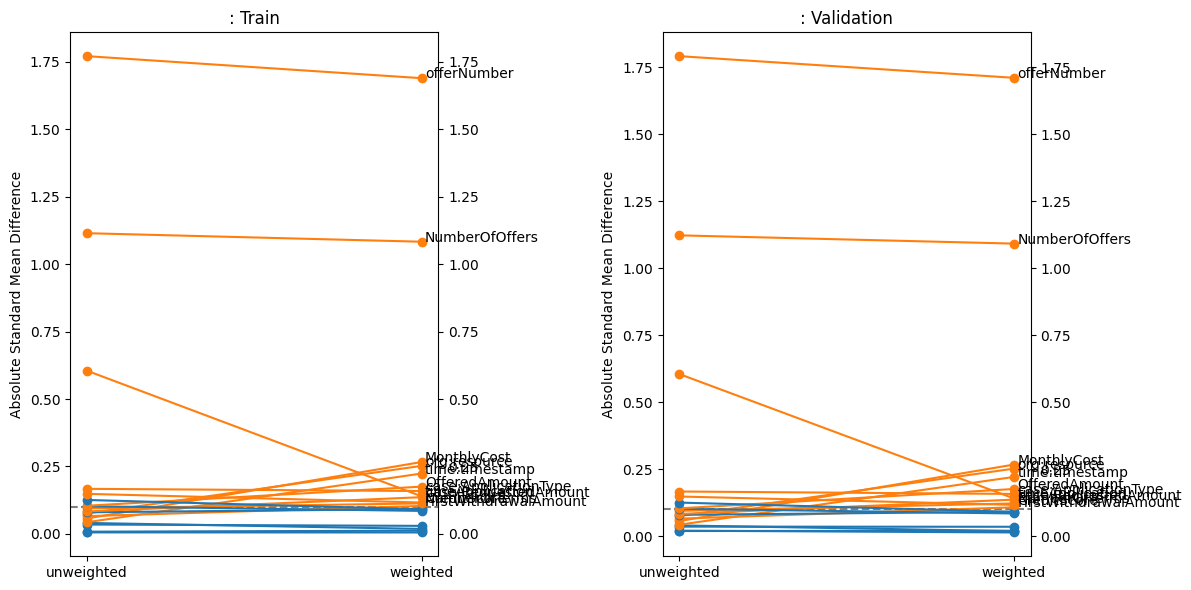

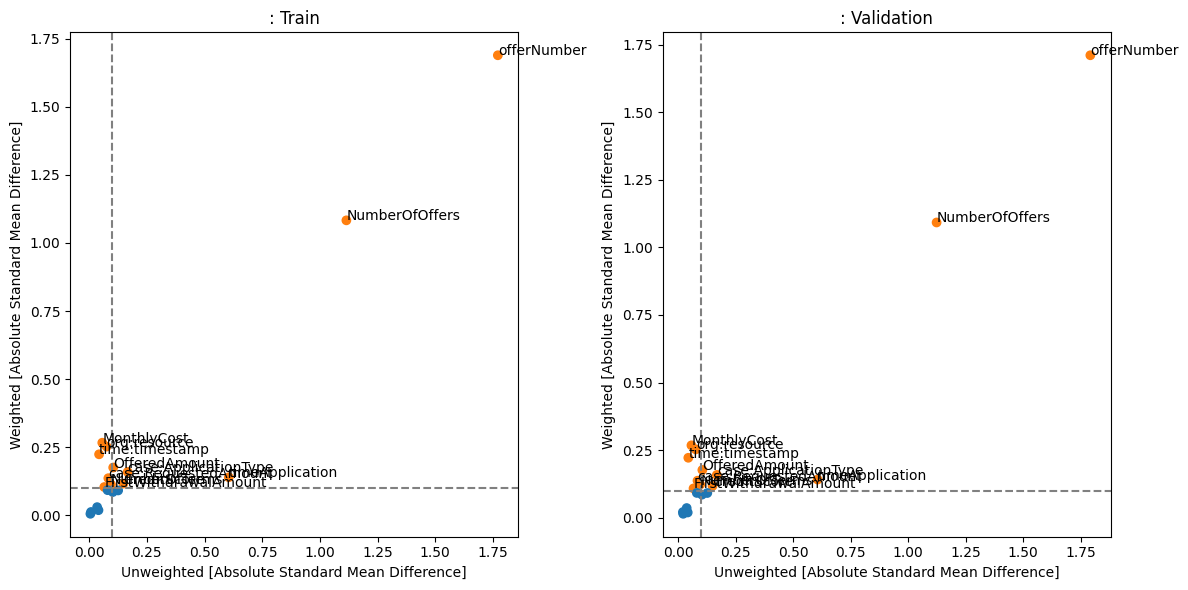

In [6]:
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="love", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="love", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();


fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="slope", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="slope", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();


fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_covariate_balance(kind="scatter", phase="train", ax=a0, thresh=0.1)
results.plot_covariate_balance(kind="scatter", phase="valid", ax=a1, thresh=0.1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

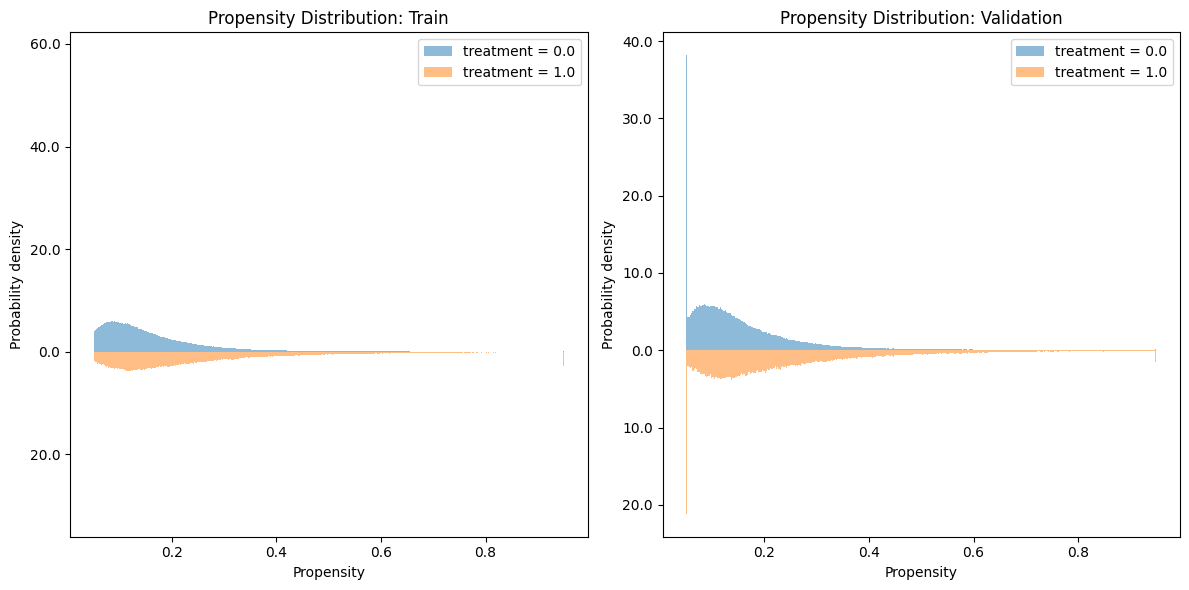

In [7]:
#Propensity/Weight Distribution
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_weight_distribution(reflect=True, ax=a0)
results.plot_weight_distribution(reflect=True, phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

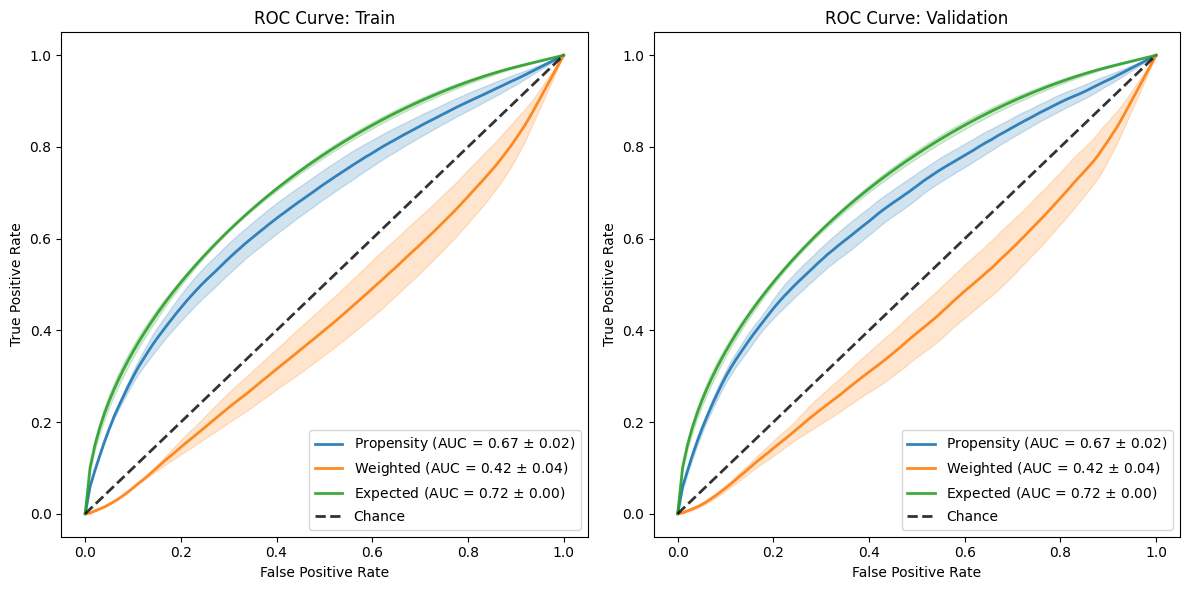

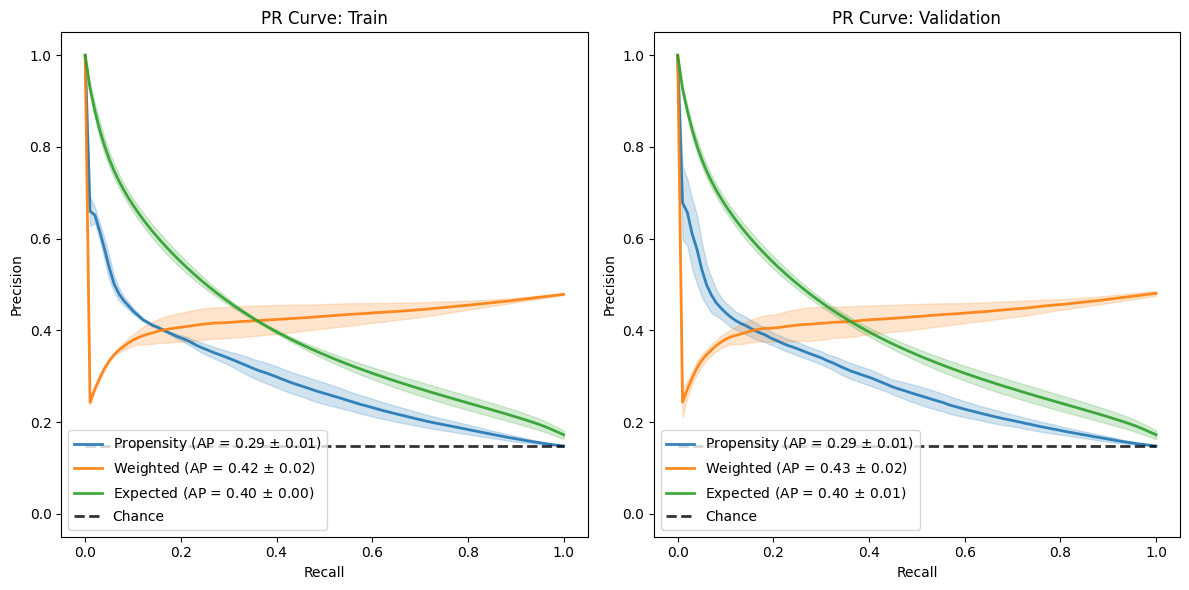

In [8]:
#ROC and Precision-Recall Curves
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_roc_curve(ax=a0)
results.plot_roc_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_pr_curve(ax=a0)
results.plot_pr_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

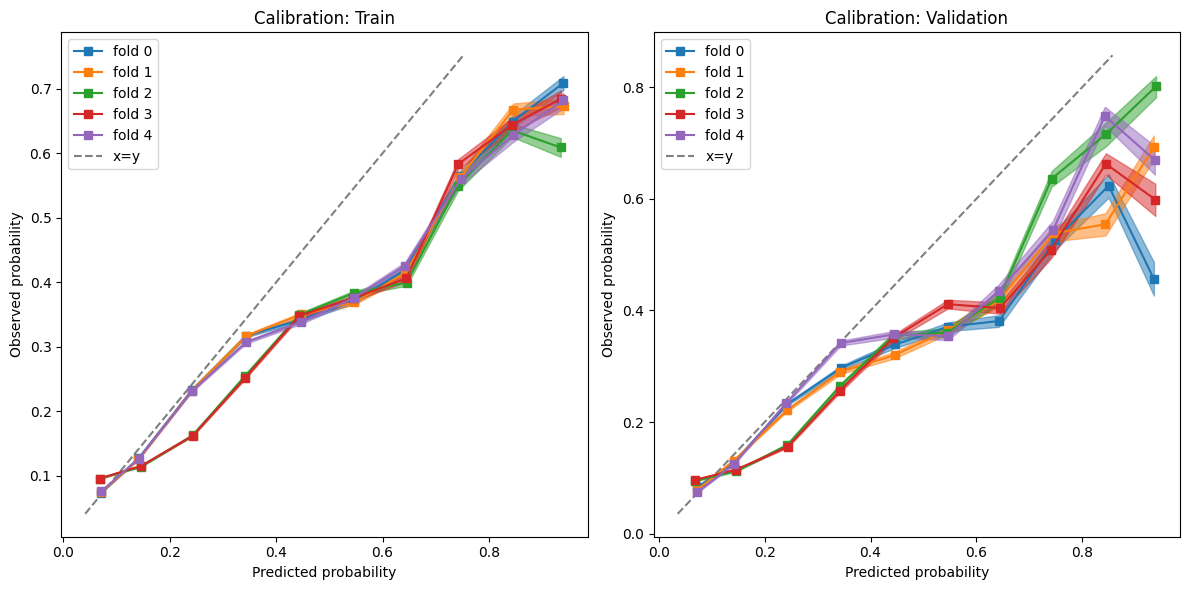

In [9]:
#Calibration
fig, [a0, a1] = plt.subplots(1, 2, figsize=(12, 6))
results.plot_calibration_curve(ax=a0)
results.plot_calibration_curve(phase="valid", ax=a1)
for ax, suffix in [(a0, "Train"), (a1 ,"Validation")]:
    ax.set_title(ax.get_title() + ": " + suffix)
plt.tight_layout();

/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/pfs/data5/home/ma/ma_ma/ma_mskiera/causallib/lib64/python3.9/site-packages/sklearn/utils/validation.py:757: Fu

{'train': {'weight_distribution': <Axes: title={'center': 'Propensity Distribution'}, xlabel='Propensity', ylabel='Probability density'>,
  'covariate_balance_love': <Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>,
  'covariate_balance_slope': <Axes: ylabel='Absolute Standard Mean Difference'>,
  'calibration': <Axes: title={'center': 'Calibration'}, xlabel='Predicted probability', ylabel='Observed probability'>,
  'pr_curve': <Axes: title={'center': 'PR Curve'}, xlabel='Recall', ylabel='Precision'>,
  'roc_curve': <Axes: title={'center': 'ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>},
 'valid': {'weight_distribution': <Axes: title={'center': 'Propensity Distribution'}, xlabel='Propensity', ylabel='Probability density'>,
  'covariate_balance_love': <Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>,
  'covariate_balance_slope': <Axes: ylabel='Absolute Standard Mean Difference'>,
  'calibration': <Axes: title={'cent

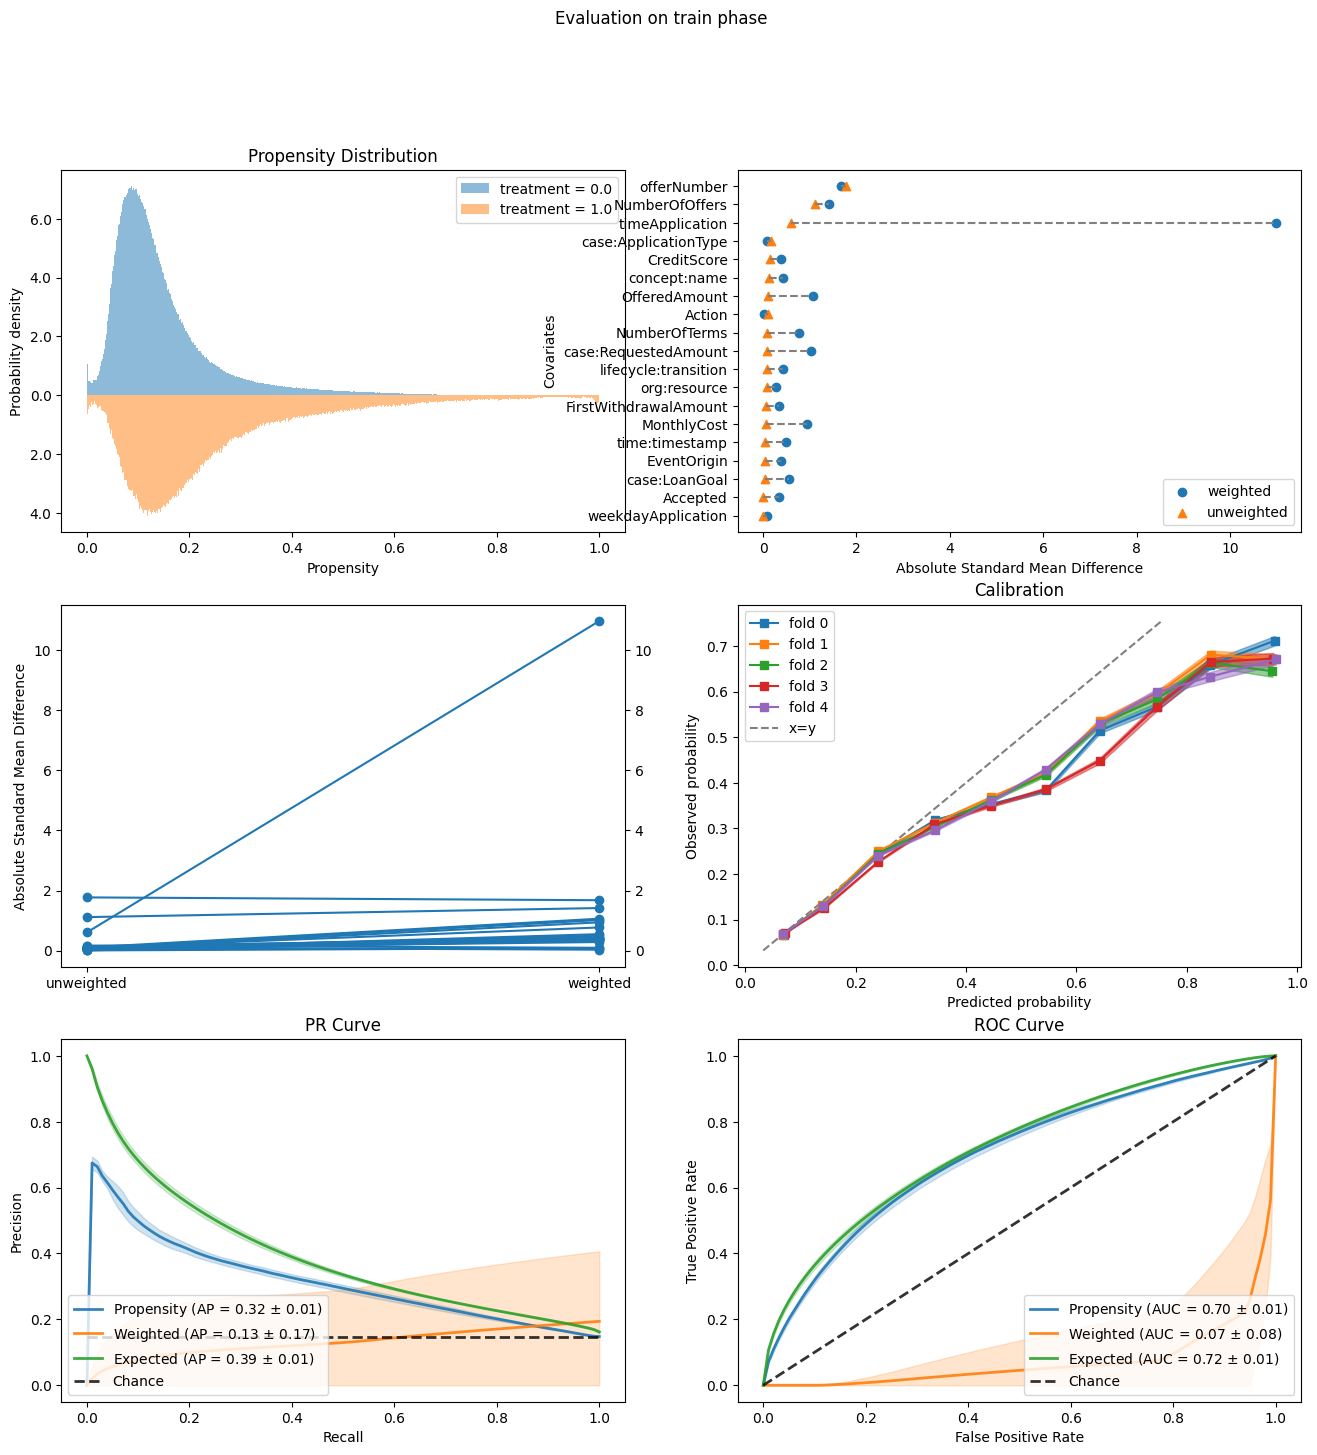

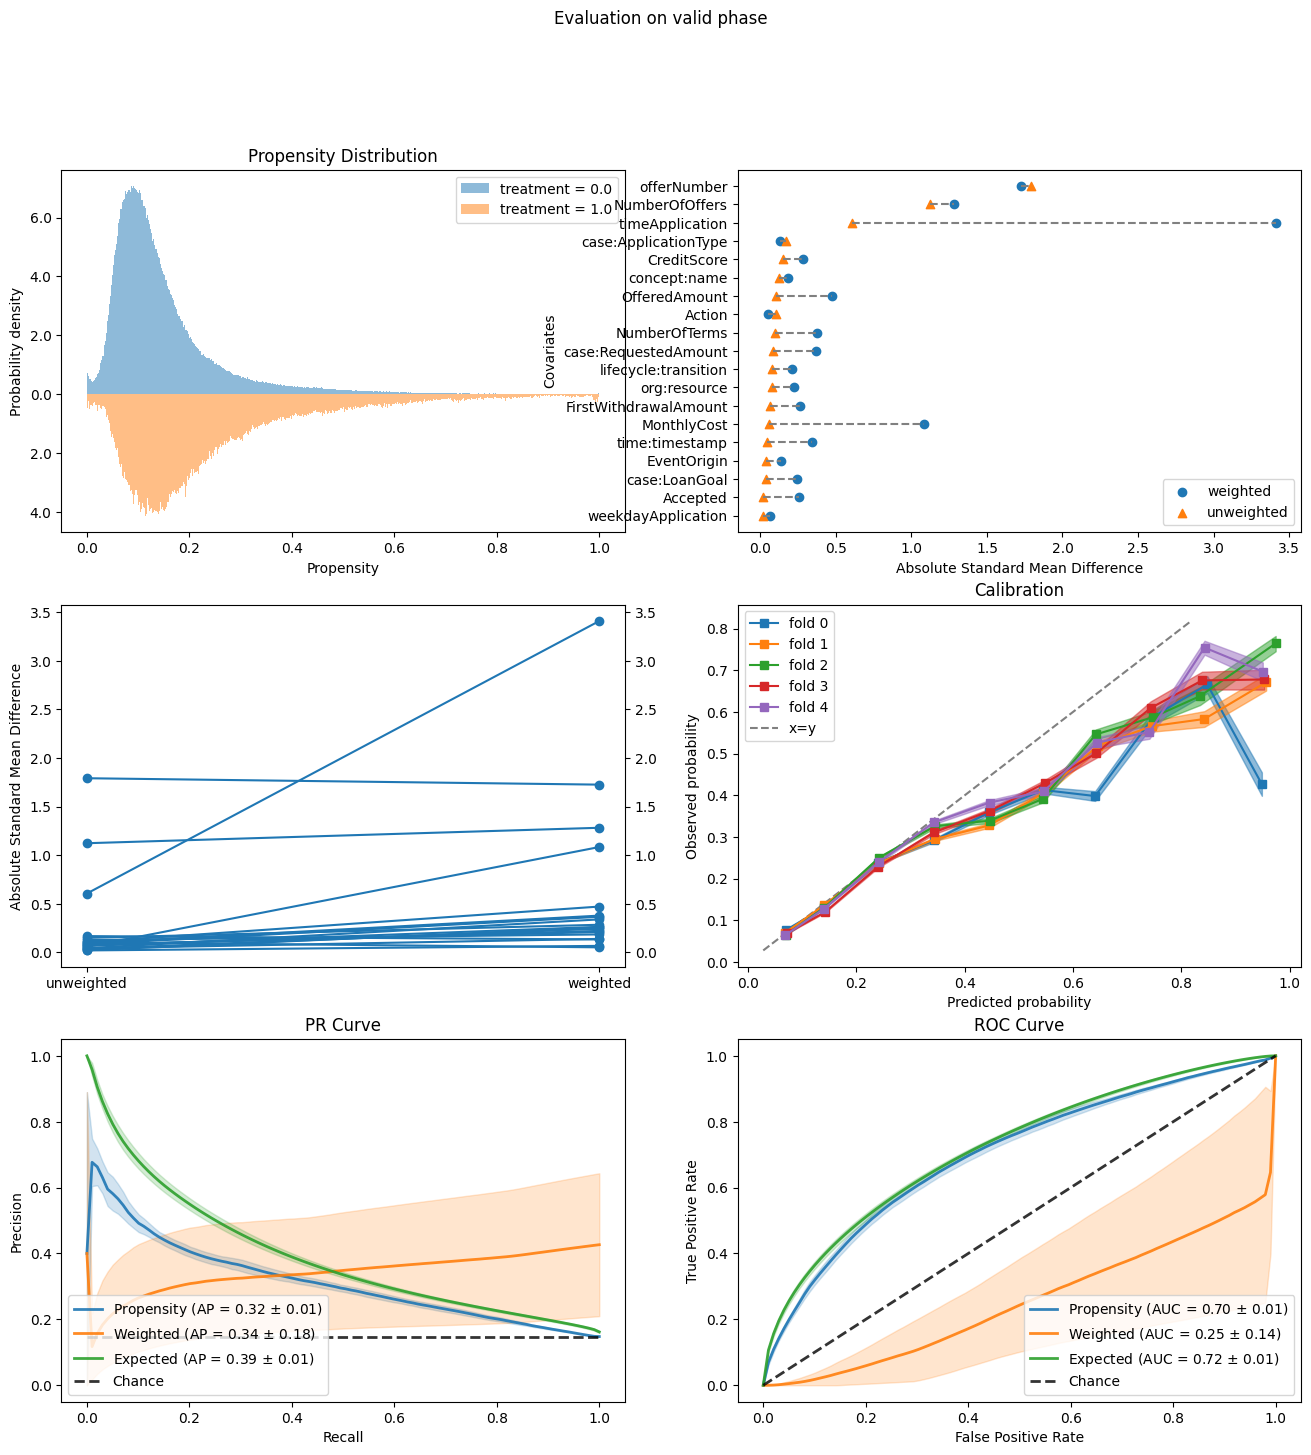

In [10]:
from sklearn import metrics
metrics = {"roc_auc": metrics.roc_auc_score,
           "avg_precision": metrics.average_precision_score,}
ipw_lr = IPW(LogisticRegression(solver="liblinear"))
results_all = evaluate(ipw_lr, X, a, y, cv="auto", metrics_to_evaluate=metrics)
results_all.plot_all()